#Pre-proocess data

In [1]:
! gdown 17OYeD6dlfwX28FNoUpqXkLVpzjUtTCRW
! unzip /content/ThaiDepression.zip

Downloading...
From: https://drive.google.com/uc?id=17OYeD6dlfwX28FNoUpqXkLVpzjUtTCRW
To: /content/ThaiDepression.zip
100% 8.78M/8.78M [00:00<00:00, 53.7MB/s]
Archive:  /content/ThaiDepression.zip
   creating: ThaiDepression/2016/
  inflating: ThaiDepression/2016/ahb-2016-10.csv  
  inflating: ThaiDepression/2016/ahb-2016-10.pdf  
  inflating: ThaiDepression/2016/ahb-2016-11.csv  
  inflating: ThaiDepression/2016/ahb-2016-11.pdf  
  inflating: ThaiDepression/2016/ahb-2016-12.csv  
  inflating: ThaiDepression/2016/ahb-2016-12.pdf  
   creating: ThaiDepression/2017/
  inflating: ThaiDepression/2017/ahb-2017-01.csv  
  inflating: ThaiDepression/2017/ahb-2017-01.pdf  
  inflating: ThaiDepression/2017/ahb-2017-02.csv  
  inflating: ThaiDepression/2017/ahb-2017-02.pdf  
  inflating: ThaiDepression/2017/ahb-2017-03.csv  
  inflating: ThaiDepression/2017/ahb-2017-03.pdf  
  inflating: ThaiDepression/2017/ahb-2017-04.csv  
  inflating: ThaiDepression/2017/ahb-2017-04.pdf  
  inflating: ThaiDepr

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = "/content/ThaiDepression/"
year_list = os.listdir(path)
year_list.sort()

df_list = []
name_list = []
 
for i in range(len(year_list)):
    file_list = os.listdir(path+year_list[i])
    file_list.sort()
    for f in file_list:
        if '.csv' in f:
            # print(f)
            name_list.append(f[4:11])
            df_list.append(pd.read_csv(path+year_list[i]+'/'+f, header=None, index_col=False))


finished_process = []
for i in range(len(df_list[0])):
    finished_process.append(pd.DataFrame(df_list[0].iloc[i,:]).T.reset_index(drop=True))
    finished_process[i]['y-m'] = name_list[0]


i=1
while(i != len(df_list)):
    # print('i=' + str(i))
    if len(df_list[i]) == 89:
        insert = { 0 : np.nan, 1 : np.nan, 2 : np.nan, 3 : np.nan, 4 : np.nan, 5 : np.nan, 6 :np.nan, 7 : np.nan, 8 : np.nan, 9 : np.nan, 'y-m' : name_list[i]}
        finished_process[89] = pd.concat([finished_process[89], pd.DataFrame(insert, index=[0])], ignore_index = True)
    for j in range(len(df_list[i])):
        # print('j=' + str(j))
        if len(df_list[i].columns) == 6 :
            insert = { 0 : df_list[i].iloc[j,0], 1 : df_list[i].iloc[j,1], 2 : np.nan, 3 : df_list[i].iloc[j,2], 4 : df_list[i].iloc[j,3], 5 : np.nan, 6 :np.nan, 7 : df_list[i].iloc[j,4], 8 : np.nan, 9 : df_list[i].iloc[j,5], 'y-m' : name_list[i]}
            finished_process[j] = pd.concat([finished_process[j], pd.DataFrame(insert, index=[0])], ignore_index = True)
        else:
            finished_process[j] = pd.concat([finished_process[j], pd.DataFrame(df_list[i].iloc[j,:]).T.reset_index(drop=True)], ignore_index = True)
            finished_process[j]['y-m'][i] = name_list[i]
    i=i+1


for i in range(len(finished_process)):
    finished_process[i].index = finished_process[i]['y-m'].values
    finished_process[i].drop(['y-m'], axis=1, inplace=True)
    # finished_process[i].index = pd.to_datetime(finished_process[i].index, format='%Y-%m')
    finished_process[i] = finished_process[i].replace(',','', regex=True)  
    finished_process[i] = finished_process[i].apply(pd.to_numeric)

    # pct_change(1) = (value on this index - value on previous index) / value on previous index

    finished_process[i]['0_pct_change'] = finished_process[i][0].pct_change(1)
    finished_process[i]['1_pct_change'] = finished_process[i][1].pct_change(1)
    finished_process[i]['2_pct_change'] = finished_process[i][2].pct_change(1)
    finished_process[i]['3_pct_change'] = finished_process[i][3].pct_change(1)
    finished_process[i]['4_pct_change'] = finished_process[i][4].pct_change(1)
    finished_process[i]['5_pct_change'] = finished_process[i][5].pct_change(1)
    finished_process[i]['6_pct_change'] = finished_process[i][6].pct_change(1)
    finished_process[i]['7_pct_change'] = finished_process[i][7].pct_change(1)
    finished_process[i]['8_pct_change'] = finished_process[i][8].pct_change(1)
    finished_process[i]['9_pct_change'] = finished_process[i][9].pct_change(1)
    # finished_process[i].loc[finished_process[i][3] == np.nan, '3_pct_change'] = np.nan
    # finished_process[i]['3_pct_change'] = finished_process[i][3].apply(lambda x: np.nan if x == np.nan else x)

In [4]:
finished_process[1]

,0,1,2,3,4,5,6,7,8,9,0_pct_change,1_pct_change,2_pct_change,3_pct_change,4_pct_change,5_pct_change,6_pct_change,7_pct_change,8_pct_change,9_pct_change
2016-10,960850,22100,10384.0,10383,46.99,46.98,11029.0,11029,49.91,49.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11,960850,22100,10384.0,10383,46.99,46.98,11030.0,11030,49.91,49.91,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000091,0.000091,0.0,0.000000
2016-12,960850,22100,10384.0,10382,46.99,46.98,11030.0,11024,49.91,49.88,0.0,0.0,0.0,-0.000096,0.000000,0.0,0.000000,-0.000544,0.0,-0.000601
2017-01,960850,22100,10384.0,10382,46.99,46.98,11030.0,11020,49.91,49.87,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,-0.000363,0.0,-0.000200
2017-02,960850,22100,10384.0,10382,46.99,46.98,11030.0,11017,49.91,49.85,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,-0.000272,0.0,-0.000401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03,1088777,25042,NaN,25223,100.72,NaN,NaN,25636,NaN,102.37,0.0,0.0,0.0,0.008718,0.008713,0.0,0.000000,0.007863,0.0,0.007876
2022-04,1088777,25042,NaN,25456,101.65,NaN,NaN,25862,NaN,103.27,0.0,0.0,0.0,0.009238,0.009234,0.0,0.000000,0.008816,0.0,0.008792
2022-05,1088777,25042,NaN,25619,102.30,NaN,NaN,26010,NaN,103.87,0.0,0.0,0.0,0.006403,0.006394,0.0,0.000000,0.005723,0.0,0.005810
2022-06,1088777,25042,NaN,25836,103.17,NaN,NaN,26214,NaN,104.68,0.0,0.0,0.0,0.008470,0.008504,0.0,0.000000,0.007843,0.0,0.007798


#Exploratory data analysis (EDA)
Meaning of row and column number: https://drive.google.com/file/d/1n8EHfQLs8aoZpjQyGFwiHoPApD_aYwI9/view?usp=sharing

Text(0.5, 0, 'Year-Month')

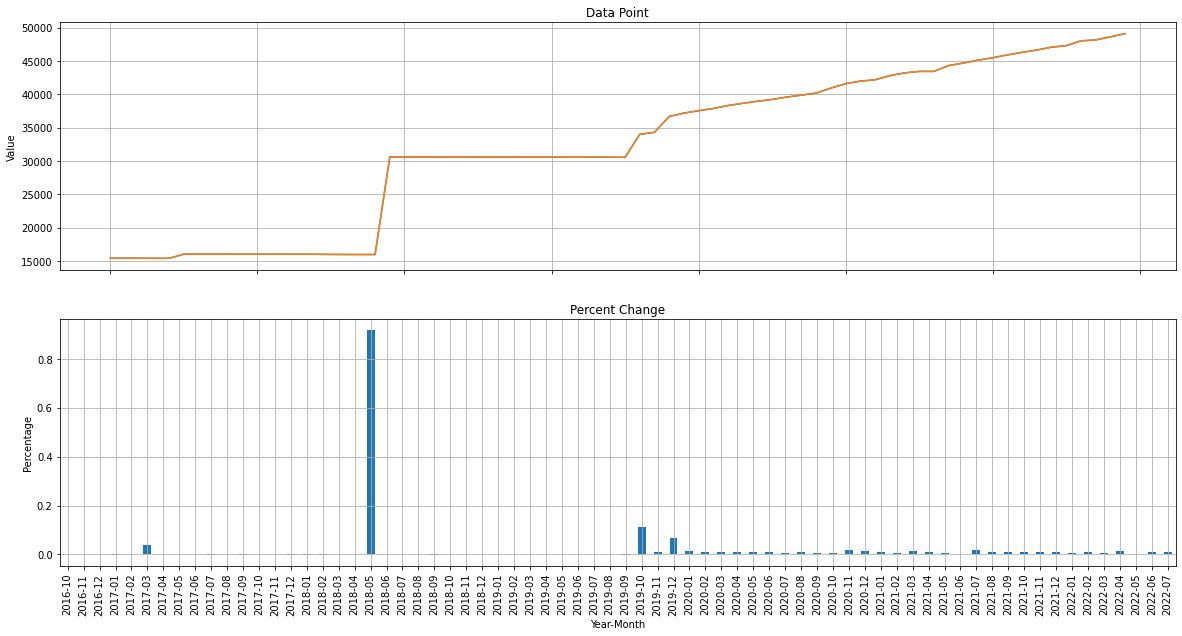

In [14]:
row = 5
column = 3


fig, axes = plt.subplots(figsize=(20,10),nrows=2, ncols=1)
finished_process[row][column].plot(ax=axes[0], kind='line', grid=True)
if column == 2 or column == 5 or column == 6 or column == 8:
    finished_process[row][column][:37].plot(ax=axes[0], kind='line', grid=True)
    finished_process[row][str(column)+'_pct_change'][:37].plot(ax=axes[1], kind='bar', grid=True, sharex=axes[0])
else:
    finished_process[row][column].plot(ax=axes[0], kind='line', grid=True)
    finished_process[row][str(column)+'_pct_change'].plot(ax=axes[1], kind='bar', grid=True, sharex=axes[0])
axes[0].set_title('Data Point')
axes[0].set_ylabel('Value')
axes[0].set_xlabel('Year-Month')
axes[1].set_title('Percent Change')
axes[1].set_ylabel('Percentage')
axes[1].set_xlabel('Year-Month')

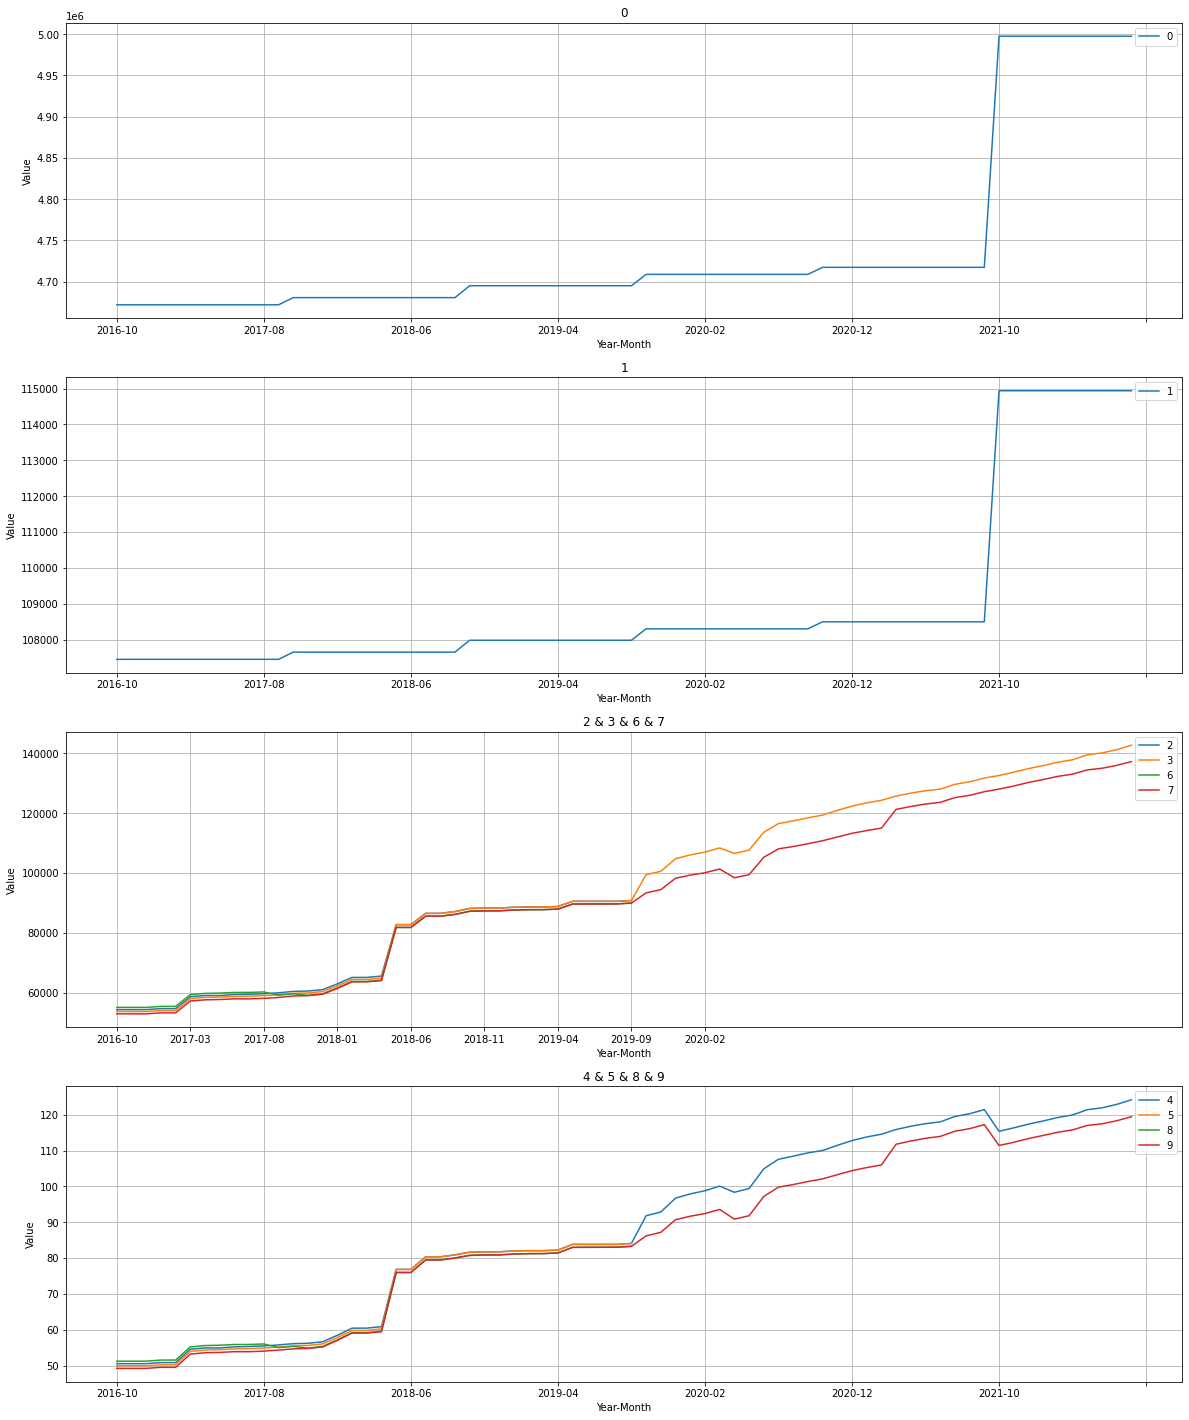

In [7]:
fig, axes = plt.subplots(figsize=(20,25),nrows=4, ncols=1)

finished_process[row][0].plot(ax=axes[0], kind='line', grid=True, label = "0")

finished_process[row][1].plot(ax=axes[1], kind='line', grid=True, label = "1")

finished_process[row][2].plot(ax=axes[2], kind='line', grid=True, label = "2")
finished_process[row][3].plot(ax=axes[2], kind='line', grid=True, label = "3")
finished_process[row][6].plot(ax=axes[2], kind='line', grid=True, label = "6")
finished_process[row][7].plot(ax=axes[2], kind='line', grid=True, label = "7")

finished_process[row][4].plot(ax=axes[3], kind='line', grid=True, label = "4")
finished_process[row][5].plot(ax=axes[3], kind='line', grid=True, label = "5")
finished_process[row][8].plot(ax=axes[3], kind='line', grid=True, label = "8")
finished_process[row][9].plot(ax=axes[3], kind='line', grid=True, label = "9")

axes[0].set_title('0')
axes[0].set_ylabel('Value')
axes[0].set_xlabel('Year-Month')
axes[0].legend()
axes[1].set_title('1')
axes[1].set_ylabel('Value')
axes[1].set_xlabel('Year-Month')
axes[1].legend()
axes[2].set_title('2 & 3 & 6 & 7')
axes[2].set_ylabel('Value')
axes[2].set_xlabel('Year-Month')
axes[2].legend()
axes[3].set_title('4 & 5 & 8 & 9')
axes[3].set_ylabel('Value')
axes[3].set_xlabel('Year-Month')
axes[3].legend()